# 샘플 파일 확인

In [1]:
import os
import json
import cv2
import matplotlib.pyplot as plt
import mediapipe as mp
import numpy as np

2025-06-20 13:13:04.417191: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-06-20 13:13:04.461089: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-06-20 13:13:04.461108: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-06-20 13:13:04.464656: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-06-20 13:13:04.477675: I tensorflow/core/platform/cpu_feature_guar

## iris_2d 이미지에 찍어보기

In [2]:
IMG_DIR="../data/raw/TrainingSet/images"
JSON_DIR="../data/raw/TrainingSet/json"

sample_name="345"
img_path=os.path.join(IMG_DIR, f"{sample_name}.jpg")
json_path=os.path.join(JSON_DIR, f"{sample_name}.json")

# 이미지
img=cv2.imread(img_path)
img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# JSON
with open(json_path, "r") as f:
    data=json.load(f)

In [3]:
print(data.keys())
display(data["iris_2d"])  # (x, y, z) 좌표 리스트

dict_keys(['interior_margin_2d', 'caruncle_2d', 'iris_2d', 'eye_details', 'lighting_details', 'eye_region_details', 'head_pose'])


['(290.7319, 201.7598, 9.0919)',
 '(291.4965, 207.1003, 9.0292)',
 '(293.5181, 212.2650, 8.9703)',
 '(296.7189, 217.0554, 8.9174)',
 '(300.9761, 221.2875, 8.8726)',
 '(306.1260, 224.7986, 8.8376)',
 '(311.9708, 227.4537, 8.8138)',
 '(318.2856, 229.1509, 8.8020)',
 '(324.8281, 229.8249, 8.8027)',
 '(331.3466, 229.4499, 8.8159)',
 '(337.5907, 228.0401, 8.8411)',
 '(343.3204, 225.6499, 8.8773)',
 '(348.3156, 222.3711, 8.9231)',
 '(352.3842, 218.3296, 8.9768)',
 '(355.3700, 213.6808, 9.0362)',
 '(357.1582, 208.6033, 9.0992)',
 '(357.6800, 203.2923, 9.1633)',
 '(356.9155, 197.9518, 9.2260)',
 '(354.8939, 192.7871, 9.2849)',
 '(351.6930, 187.9967, 9.3378)',
 '(347.4358, 183.7647, 9.3826)',
 '(342.2859, 180.2536, 9.4176)',
 '(336.4412, 177.5984, 9.4414)',
 '(330.1263, 175.9012, 9.4532)',
 '(323.5839, 175.2272, 9.4525)',
 '(317.0654, 175.6022, 9.4393)',
 '(310.8213, 177.0120, 9.4141)',
 '(305.0916, 179.4022, 9.3779)',
 '(300.0964, 182.6810, 9.3321)',
 '(296.0277, 186.7225, 9.2784)',
 '(293.042

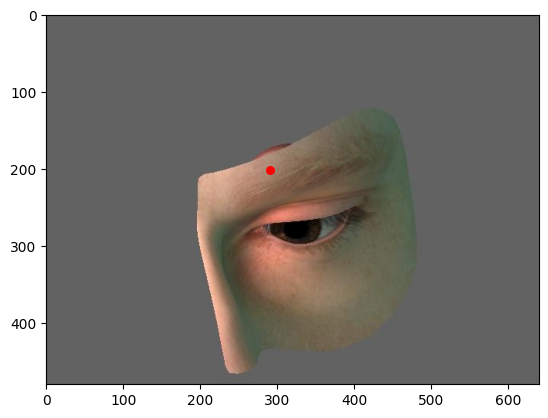

In [8]:
# 문자열 형태의 좌표를 숫자 튜플로 변환하려면 eval()
iris_2d=data["iris_2d"]
x, y, _=eval(iris_2d[0])  # 문자열 (x, y, z) -> 튜플로 변환

plt.imshow(img)
plt.scatter(x, y, c="red", s=30, label="iris_2d[0]")
plt.show()

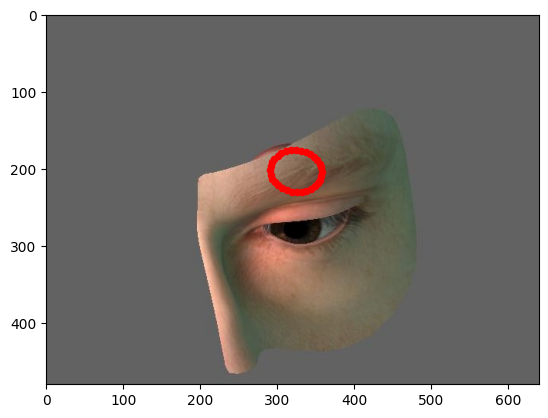

In [10]:
import ast

iris=[ast.literal_eval(point) for point in data["iris_2d"]]
xs=[point[0] for point in iris]
ys=[point[1] for point in iris]

plt.imshow(img)
plt.scatter(xs, ys, c="red", s=20, label="iris_2d")
plt.show()

이상하게 찍고 있음

## interior_margin_2d

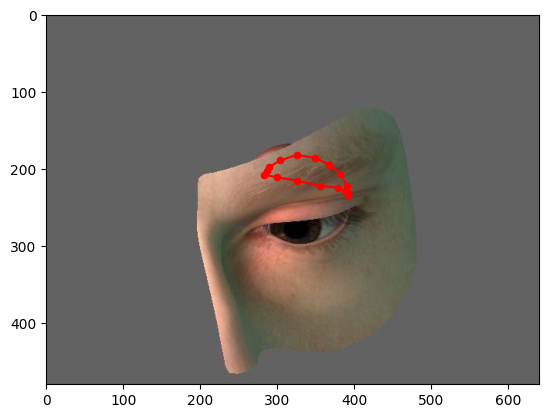

In [11]:
interior_points=[ast.literal_eval(point) for point in data["interior_margin_2d"]]
xs=[point[0] for point in interior_points]
ys=[point[1] for point in interior_points]

plt.imshow(img)
plt.scatter(xs, ys, c="red", s=20, label="interior_margin_2d")
plt.plot(xs+[xs[0]], ys+[ys[0]], c="red")
plt.show()

## MediaPipe 얼굴 인식 시도

In [12]:
mp_face_mesh=mp.solutions.face_mesh
face_mesh=mp_face_mesh.FaceMesh(static_image_mode=True)

img=cv2.imread("../data/raw/TrainingSet/images/345.jpg")
rgb=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

results=face_mesh.process(rgb)

if results.multi_face_landmarks:
    annotated=img.copy()
    for lm in results.multi_face_landmarks:
        for idx in [33, 133, 159, 145]:  # 왼쪽 눈 일부 landmark 예시
            x=int(lm.landmark[idx].x * img.shape[1])
            y=int(lm.landmark[idx].y * img.shape[0])
            cv2.circle(annotated, (x, y), 2, (0, 255, 0), -1)
    plt.imshow(cv2.cvtColor(annotated, cv2.COLOR_BGR2RGB))
    plt.show()
else:
    print("얼굴을 인식하지 못함.")

얼굴을 인식하지 못함.


libEGL warning: MESA-LOADER: failed to open swrast: /usr/lib/dri/swrast_dri.so: cannot open shared object file: No such file or directory (search paths /usr/lib/x86_64-linux-gnu/dri:\$${ORIGIN}/dri:/usr/lib/dri, suffix _dri)

libEGL warning: MESA-LOADER: failed to open swrast: /usr/lib/dri/swrast_dri.so: cannot open shared object file: No such file or directory (search paths /usr/lib/x86_64-linux-gnu/dri:\$${ORIGIN}/dri:/usr/lib/dri, suffix _dri)

libEGL warning: MESA-LOADER: failed to open swrast: /usr/lib/dri/swrast_dri.so: cannot open shared object file: No such file or directory (search paths /usr/lib/x86_64-linux-gnu/dri:\$${ORIGIN}/dri:/usr/lib/dri, suffix _dri)

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
W0000 00:00:1750393169.221362   32402 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1750393169.233962   32402 inference_feedback_manager.cc:114] Feedback ma

회색 배경 탓에 실패

## YOLOv8n 인식 시도


0: 480x640 2 persons, 29.1ms
Speed: 3.1ms preprocess, 29.1ms inference, 207.5ms postprocess per image at shape (1, 3, 480, 640)


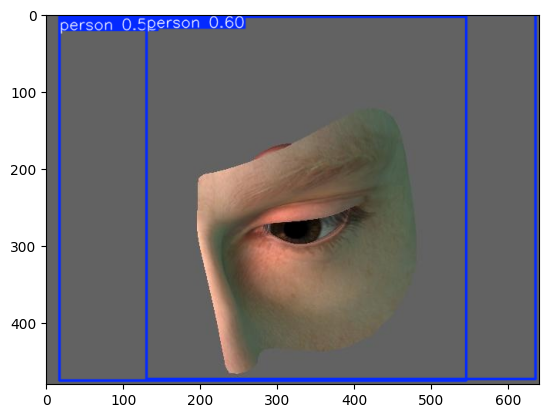

In [13]:
from ultralytics import YOLO

model=YOLO("yolov8n.pt")
img=cv2.imread("../data/raw/TrainingSet/images/345.jpg")
results=model(img)

plt.imshow(cv2.cvtColor(results[0].plot(), cv2.COLOR_BGR2RGB))
plt.show()

전체 얼굴 정도만 가능 (눈은 못함)

## 배경 색상 ColorPick 이후 제거 시도

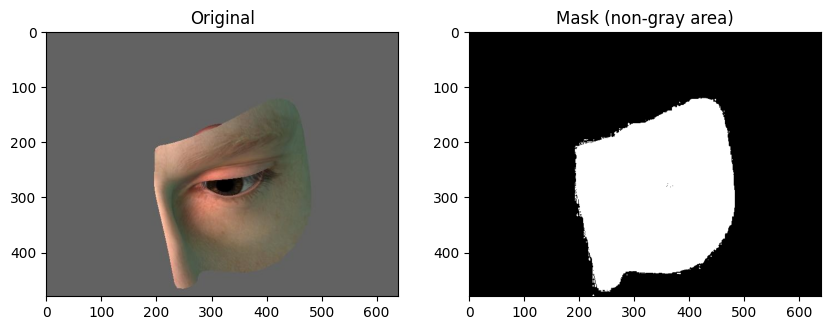

In [20]:
import os

IMG_PATH="../data/raw/TrainingSet/images/345.jpg"
img=cv2.imread(IMG_PATH)
img_rgb=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

gray_value=np.array([98, 98, 98])
difference_check_value=5

# 각 픽셀이 회색 배경과 일치하는지 확인
difference=np.abs(img_rgb-gray_value)
gray_mask=np.all(difference<difference_check_value, axis=-1).astype(np.uint8)

# 회색이 아닌 영역 -> 1로 설정
mask=(1-gray_mask).astype(np.uint8)

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.title("Original")

plt.subplot(1, 2, 2)
plt.imshow(mask, cmap="gray")
plt.title("Mask (non-gray area)")
plt.show()

제대로 인식한 거 같다.  

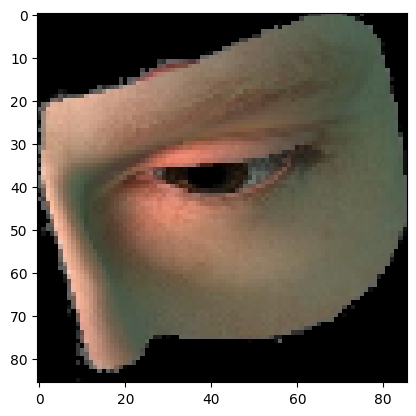

In [ ]:
# 마스크 기반 crop + resize
def crop_and_resize(image, mask, output_size=(86, 86)):
    nonzero_pts=cv2.findNonZero(mask)
    if nonzero_pts is None:
        print("마스크가 비어 있음. crop 실패.")
        return None
    x, y, w, h=cv2.boundingRect(nonzero_pts)

    # 마스크 적용 후 crop
    masked=cv2.bitwise_and(image, image, mask=mask)
    cropped=masked[y:y+h, x:x+w]

    # resize
    return cv2.resize(cropped, output_size)

final=crop_and_resize(img_rgb, mask)
plt.imshow(final)
plt.show()

## 검은 부분 살색으로 채우기  

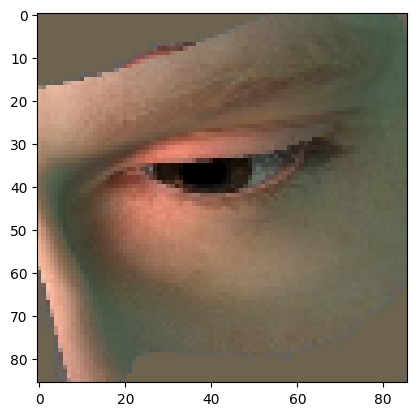

In [32]:
import os

IMG_PATH="../data/raw/TrainingSet/images/345.jpg"
img=cv2.imread(IMG_PATH)
img_rgb=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# ColorPicker로 측정한 회색 RGB
gray_value=np.array([98, 98, 98])
difference_check_value=5

diff=np.abs(img_rgb - gray_value)
gray_mask=np.all(diff<difference_check_value, axis=-1).astype(np.uint8)
mask=(1-gray_mask).astype(np.uint8)  # 눈과 피부만 -> 1로

# 눈 중심만 crop -> 좌우 여백 제거
def crop_with_trim(image, mask, trim=20):
    nonzero_pts=cv2.findNonZero(mask)
    if nonzero_pts is None:
        return None, None
    x, y, w, h=cv2.boundingRect(nonzero_pts)
    
    x=x+trim
    y=y+trim
    w=w-trim*2
    h=h-trim*2
    x=max(x, 0)
    y=max(y, 0)
    w=max(w, 10)
    h=max(h, 10)
    cropped_img=image[y:y+h, x:x+w]
    cropped_mask=mask[y:y+h, x:x+w]
    return cropped_img, cropped_mask

# 배경을 주변 피부색(median)으로 채우기
def fill_with_median(image, mask, output_size=(86, 86)):
    filled=image.copy()
    bg_color=np.median(image[mask==1], axis=0).astype(np.uint8)
    filled[mask==0]=bg_color

    nonzero_pts=cv2.findNonZero(mask)
    if nonzero_pts is None:
        return None

    x, y, w, h=cv2.boundingRect(nonzero_pts)
    cropped=filled[y:y+h, x:x+w]
    return cv2.resize(cropped, output_size)


cropped_img, cropped_mask=crop_with_trim(img_rgb, mask, trim=20)
final=fill_with_median(cropped_img, cropped_mask)

plt.imshow(final)
plt.show()

Json 파일들이 사용되지 않으므로 `03_data-preprocessing.ipynb` 파일에서는 이미지 분리부터 다시 시작할 예정  
1. 압축을 풀고나서 raw폴더에 전체 내용을 담아둔다.  
2. 우리는 이제 먼저 전체 폴더에서 유일하게 사용하는 이미지들만 가져오면된다.  
3. 따라서 Opened와 Closed라는 폴더를 생성하고 그 곳으로 이미지 파일들만 다 옮기는데  
이미지명이 (숫자).jpg의 형태니까 앞에 train_(숫자).jpg, test_(숫자).jpg, Imp_(숫자).jpg 이런식으로 파일명을 변경해서 (숫자).jpg 가 숫자가 겹쳐서 덮어쓰기가 되지 않도록 잘 처리해준다.  
4. 그렇다면 최종적으로 test/data/raw/Closed, test/data/raw/Opened 가 된다.  
5. 이제 앞서 진행했던 것과 같이 crop및 살색으로 채웠던 그 코드를 이어서 실행하고 그 실행결과는 최종우리가 사용할 데이터셋이 되는 test/data/processed/Closed와 test/data/processed/Opened로 저장된다.  
6. 이 과정을 03_data-preprocessing.ipynb 파일에서 진행한다.   